# 1. QUESTION :  Are users growing in India ?

# 2. HYPOTHESES: 

### 2.1 User growth may related to downloads / growth rate of downloads / using period / activity 
### 2.2 If business is getting better, then the average of "days_active" of user should raise 
### 2.3 Similar as above, if business good, uninstalled, uninstall_date should decline 
### 2.4 Compare with operation in other cities

# 3. INDEX : 
## 3.1 DATA PREPARATION 
## 3.2 DATA CLEANING 
## 3.3 GENERAL ANALYSIS
- 3.3.1 Downloads
- 3.3.2 USING PERIOD
- 3.3.3 USING LOCATION



 



# 4. OBSERVATIONS:

- 4.1  Downloads grow linearly, since March 2016 and now are nearly 10,000 totally 
- 4.2. Monthly Downloads are similar during Apr. 2016 -  Aug. 2016, but change periodically daily
- 4.3. Most users' Using_period (last_session_date - install_date) are less than 10 days since "Using_period" curve decay very quick 

- 4.4. Average ACTIVE DAYS ( average days_active by install day) are about 2~4 days, but drop a little bit since Aug. 2016  
- 4.5. Amount of Uninstall peak in May 2016 (2016/05/10) while the Downloads is normal, worth to find out what happen in that period 

- 4.6 India's growth is better than multiple places like LT, TR, RU, it's worth to take a further look since operation time is still short compare other places 

- 4.7 India's MOM (month over month) dont reach the 10 % target (average MOM = 3665% and median MOM = 0% )



# 5. SUMMARY:

#### * India's growth looks good (ranked 3 over 10 cities), but MOM / users engagement / users activity need to be raised.
  
#### * Downloads raise after March 2016, but  APP uninstall  also increase gradually, while using activity, using  period are nearly same, had better to take some way to keep retention of users in India. 
  
  
  
  


In [19]:
import sqlite3
import datetime as dt   
import time
import csv
import requests
import pandas as pd, numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 3.1 DATA PREPARATION

In [20]:
# helper functions

def sqlite_test():
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/traffic.db')
		c = conn.cursor()
		query = "select * from trafi limit 10 ;"
		df = pd.read_sql_query(query, conn)
		print (df)
		print ("Sqlite connect OK")
	except:
		print ("Sqlite connect failed")




def sqlite_query_df(query):
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/traffic.db')
		c = conn.cursor()
		df = pd.read_sql_query(query, conn)
		print ("Sqlite connect OK")
		return df 
	except:
		print ("Sqlite connect failed")

In [21]:
query= '''

WITH avg_days_active AS
  (SELECT install_date,
          avg(days_active) AS avg_active_day
   FROM trafi
   WHERE country == 'IN'
   GROUP BY install_date )
SELECT avg_days_active.avg_active_day,
       julianday(trafi.last_session_date) - julianday(trafi.install_date) AS using_period,
       julianday(trafi.uninstall_date) - julianday(trafi.install_date) AS install_uninstall_period,
       trafi.*
FROM trafi
JOIN avg_days_active ON avg_days_active.install_date = trafi.install_date



'''
df = sqlite_query_df(query)

Sqlite connect OK


In [22]:
query= '''

select * 
FROM trafi

'''
df_all = sqlite_query_df(query)

Sqlite connect OK


#  3.2 DATA CLEANING

In [23]:
df.groupby('country').count()['uid']

country
-other     1644
BR        20206
EE          833
ID         3606
IN         9443
LT         6157
LV         1007
RU        12356
TR        24870
TW        15069
US          207
Name: uid, dtype: int64

In [24]:
df_india= df[df['country'] =='IN']

In [25]:
len(df_india)

9443

# 3.3 GENERAL ANALYSIS 

# 3.3.1  Downloads 

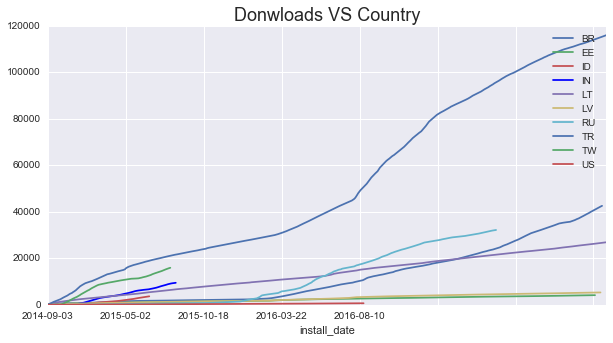

In [26]:
# compare downloads in IN and other countries 


df_all[df_all['country']=='BR'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='EE'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='ID'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='IN'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5),c='b')
df_all[df_all['country']=='LT'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='LV'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='RU'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='TR'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='TW'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))
df_all[df_all['country']=='US'].groupby('install_date').count().cumsum()['uid'].plot(figsize=(10, 5))



plt.legend(['BR', 'EE', 'ID', 'IN', 'LT', 'LV', 'RU', 'TR', 'TW', 'US'])
plt.title('Donwloads VS Country',fontsize=18)

In [27]:
# mom growth 
# change string to timestamp and only get year-month part 

df_all['year_month'] = pd.to_datetime(df_all['install_date']).map(lambda x: x.strftime('%Y-%m'))

df_mom = df_all[df_all['country']=='IN'].groupby('year_month').count()['uid'].reset_index()
df_mom.columns=['year_month','download']

In [28]:
#  via shift method, calculate MOM value 

df_mom['shift'] = df_mom['download'].shift(periods=1)
df_mom['mom (%)'] = ((df_mom['download'] - df_mom['shift'] )/df_mom['shift']) *100

In [29]:
df_mom

year_month  download   shift       mom (%)
0     2014-09         1     NaN           NaN
1     2014-10         1     1.0      0.000000
2     2015-02         1     1.0      0.000000
3     2015-05         3     1.0    200.000000
4     2015-06         4     3.0     33.333333
5     2015-07         3     4.0    -25.000000
6     2015-10         2     3.0    -33.333333
7     2015-11         2     2.0      0.000000
8     2015-12         4     2.0    100.000000
9     2016-01         2     4.0    -50.000000
10    2016-02         6     2.0    200.000000
11    2016-03         3     6.0    -50.000000
12    2016-04      1752     3.0  58300.000000
13    2016-05      2112  1752.0     20.547945
14    2016-06      2227  2112.0      5.445076
15    2016-07      2032  2227.0     -8.756174
16    2016-08      1288  2032.0    -36.614173

In [30]:
print ('mean:')
print (df_mom.mean())
print ('median :')
print (df_mom.median())

mean:
download     555.470588
shift        509.687500
mom (%)     3665.976417
dtype: float64
median :
download    3.0
shift       3.0
mom (%)     0.0
dtype: float64


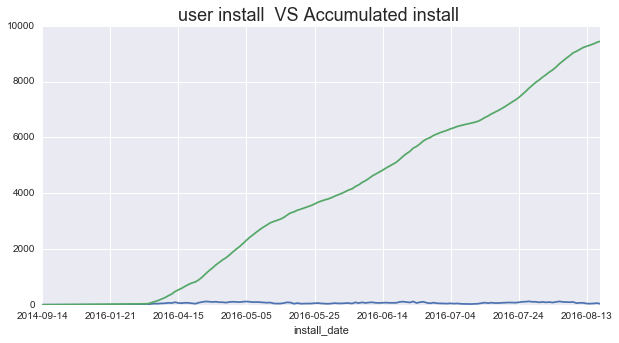

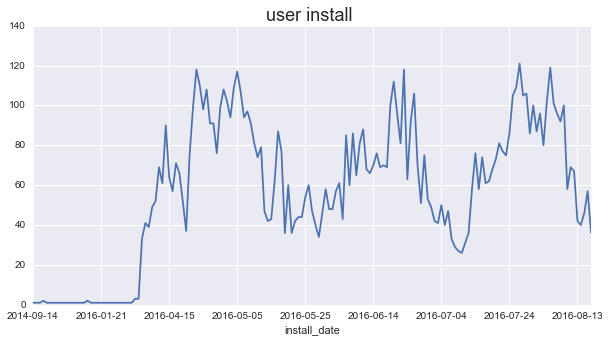

In [31]:
df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
df_india.groupby('install_date').count().cumsum()['device_uuid'].plot(figsize=(10, 5))
plt.title('user install  VS Accumulated install ',fontsize=18)

plt.show()


df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
plt.title('user install ',fontsize=18)

##  3.3.1 USING PERIOD 

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


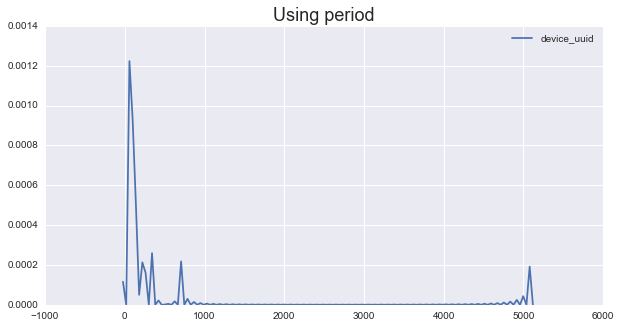

In [32]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_india.groupby('using_period').count()['device_uuid'])
plt.title('Using period',fontsize=18)



plt.show()

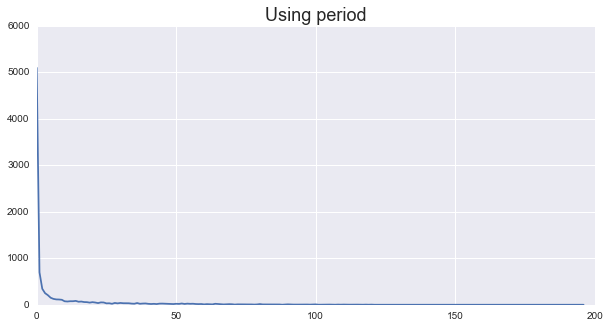

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df_india.groupby('using_period').count()['device_uuid'])
plt.title('Using period',fontsize=18)



plt.show()

## 3.3.3 ACTIVE DAYS 

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


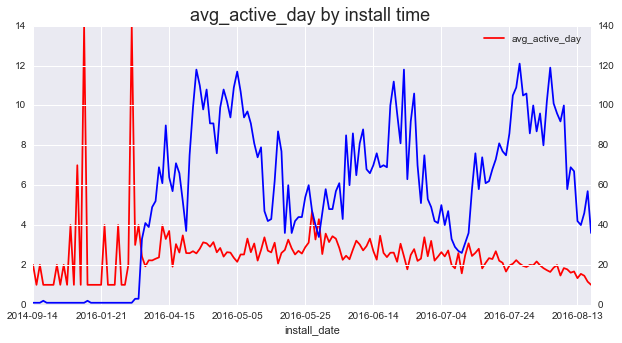

In [34]:
# red line :  AVG active day by install time
# blue line :  Number of installation



ax = df_india[['install_date','avg_active_day']].sort('install_date').drop_duplicates('install_date').set_index('install_date').plot(figsize=(10, 5), color='r')
plt.title('avg_active_day by install time ',fontsize=18)

ax2= ax.twinx()


df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5), color='b')

plt.show()


## 3.3.3 UNINSTALL DATE 

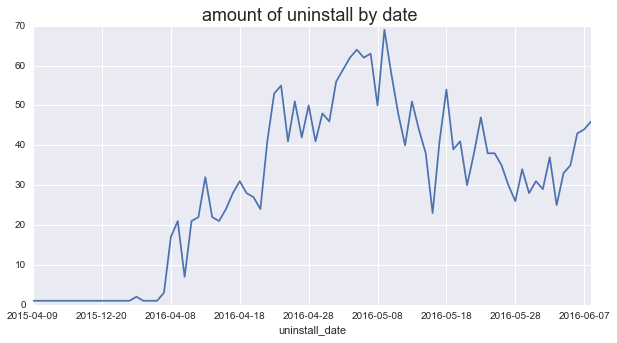

In [35]:
df_india.dropna().groupby('uninstall_date').count()['uid'].plot(figsize=(10, 5))
plt.title('amount of uninstall by date ',fontsize=18)